# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Retno Pinka Pratiwi
- **Email:** retnopinka20@gmail.com
- **ID Dicoding:** enopinka

## Menentukan Pertanyaan Bisnis

- Di musim apakah yang memiliki jumlah perental sepeda terbanyak?
- Bulan apa yang memiliki peminjaman sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses gathering data dimulai dari memuat seluruh tabel pada dataset. Dataset yang digunakan memiliki 2 tabel, maka kita akan memuat satu per satu tabel tersebut.

Karena file dataset tersimpan di dalam drive, maka perlu melalukan import drive terlebih dahulu

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


memuat data pada tabel day.csv

In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/proyek-analisis-data-dicoding/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat data tabel hours.csv

In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/proyek-analisis-data-dicoding/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan masing-masing memiliki total 17 kolom untuk dataset hour dan 16 kolom untuk dataset day
- Kolom-kolom yang ada di sana diantaranya adalah sebagai berikut
  - instant => index dari data
  - dteday => date/tanggal record
  - season => musim (1:springer, 2:summer, 3:fall, 4:winter)
  - yr => tahun
  - mnth => bulan
  - hr (untuk tabel day, kolom ini ada)
  - holiday => hari libur atau tidak
  - weekday => hari ke-berapa dalam satu minggu
  - workingday => hari kerja atau bukan
  - temp => suhu normal dalam satuan Celsius
  - atemp => suhu normal yang dirasakan
  - hum => kelembapan (humidity)
  - windspeed => kecepatan angin
  - casual => pengguna casual
  - registered => pengguna yang teregistrasi
  - cnt => count of total, baik casual maupun registered

### Assessing Data

#### menilai data dari tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pengecekan apakah terdapat data yang terduplikat.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Berdasarkan hasil penilaian data dari tabel _day_df_, kita tidak menemukan adanya kejanggalan dalam data. Semua data diketahui tidak ada menunjukkan adanya _missing values_ dan data yang terduplikat.

#### Menilai data dari tabel hour.csv

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa apakah terdapat data yang terduplikat

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Berdasarkan hasil penilaian data dari tabel _hour_df_, kita tidak menemukan adanya kejanggalan dalam data. Semua data diketahui tidak ada menunjukkan adanya _missing values_ dan data yang terduplikat.

### Cleaning Data

**Insight:**

Dikarenakan hasil dari tahap Assessing Data tidak terdapat adanya missing values maupun data yang terduplikat, maka tidak ada data yang perlu dilakukan pada tahap cleaning data.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**

Menggunakan fungsi describe(), kita akan mengetahui data-data yang terdapat pada tabel ini. Selanjutnya, kita akan mencoba untuk menghitung peminjaman sepeda berdasarkan musim.

In [10]:
day_df.groupby("season").instant.count()

,instant
season,
1,181
2,184
3,188
4,178


**Insight:**

Diketahui bahwa terdapat empat musim, diantaranya adalah yang didapatkan data seperti dijelaskan di bawah ini
- Springer (musim semi) yang diwakili angka 1 memiliki **181 jumlah peminjam**
- Summer (musim panas) yang diwakili dengan angka 2 memiliki **184 jumlah peminjam**
- Fall (musim gugur) yang diwakili dengan angka 3 memiliki **188 jumlah peminjam**
- Winter (musim dingin) yang diwakili dengan angka 4 memiliki **178 jumlah peminjam**


Mengubah value holiday dan not holiday




In [11]:
day_df["holiday"] = day_df["holiday"].apply(lambda x: "holiday" if x == 1 else "not holiday")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,not holiday,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,not holiday,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,not holiday,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,not holiday,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,not holiday,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah value untuk season

In [12]:
day_df["season"] = day_df["season"].apply(lambda x: "springer" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,not holiday,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,not holiday,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,not holiday,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,not holiday,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,not holiday,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Explore data hour_df

In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**

Menggunakan fungsi describe(), kita akan mengetahui data-data yang terdapat pada tabel ini. Selanjutnya, kita akan mencoba untuk menghitung peminjaman sepeda berdasarkan weathersit.

Mengubah value holiday dan not holiday

In [14]:
hour_df["holiday"] = hour_df["holiday"].apply(lambda x: "holiday" if x == 1 else "not holiday")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,not holiday,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,not holiday,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,not holiday,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,not holiday,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,not holiday,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


mengubah value untuk season

In [15]:
hour_df["season"] = hour_df["season"].apply(lambda x: "springer" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,not holiday,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,not holiday,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,not holiday,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,not holiday,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,not holiday,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
hour_df.groupby("weathersit").instant.count()

,instant
weathersit,
1,11413
2,4544
3,1419
4,3


**Insight:**

Diketahui bahwa terdapat empat jenis weathersit, diantaranya adalah yang didapatkan data seperti dijelaskan di bawah ini
- *Clear, Few clouds, Partly cloudy, Partly cloudy* yang diwakili angka 1 memiliki **11413 jumlah peminjam**
- *Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist* yang diwakili dengan angka 2 memiliki **4544 jumlah peminjam**
- *Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds* yang diwakili dengan angka 3 memiliki **1419 jumlah peminjam**
- *Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog* yang diwakili dengan angka 4 memiliki **3 jumlah peminjam**


### Explore data all_df

In [17]:
all_df = pd.merge(day_df, hour_df)
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr


## Visualization & Explanatory Analysis

### Pertanyaan 1: Di bulan apakah yang memiliki jumlah perental sepeda terbanyak?

In [18]:
rent_per_month = hour_df.groupby("mnth").instant.count().add(day_df.groupby("mnth").instant.count())
print(rent_per_month.sort_values(ascending=False))

mnth
5     1550
7     1550
12    1545
8     1537
3     1535
10    1513
6     1500
4     1497
9     1497
11    1497
1     1491
2     1398
Name: instant, dtype: int64


Selanjutnya adalah membuat data visualisasi berdasarkan bulan

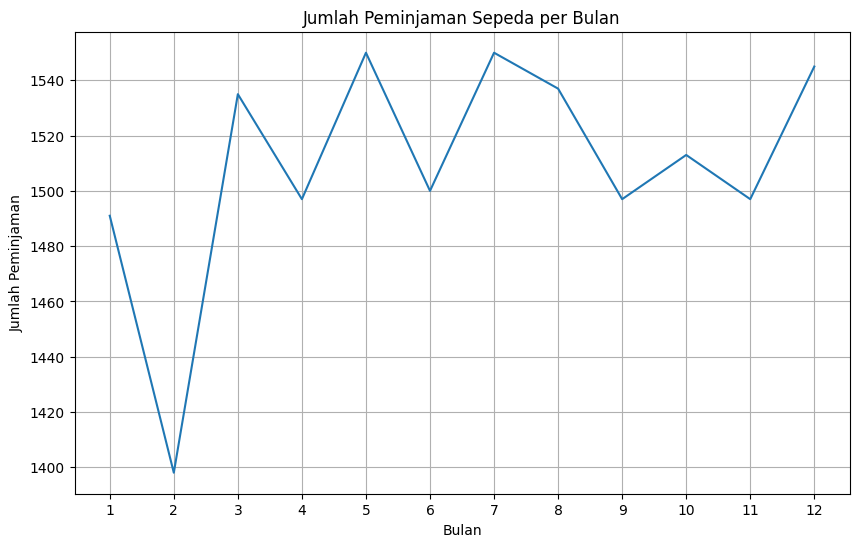

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(rent_per_month)
plt.title("Jumlah Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**Insight:**
Untuk menghitung jumlah peminjam terbanyak dalam bulan tertentu, dilakukan penghitungan jumlah peminjam. Penghitungan ini dilakukan dengan menjumlahkan peminjam di tabel day_df dan hour_df.

Kesimpulan yang dapat diambil adalah bulan yang memiliki jumlah peminjam terbanyak adalah bulan ke 5 (Mei) kemudian disusul dengan bulan ke 7 (Juli). Sedangkan bulan dengan peminjam sepeda paling sedikit adalah bulan ke 2 (Februari).

### Pertanyaan 2: Musim apa yang memiliki peminjaman sepeda paling banyak?

In [22]:
rent_per_season = hour_df.groupby("season").instant.count().add(day_df.groupby("season").instant.count())
print(rent_per_season.sort_values(ascending=False))

season
fall        4684
summer      4593
springer    4423
winter      4410
Name: instant, dtype: int64


Selanjutnya dilakukan proses visualisasi data berdasarkan musim.

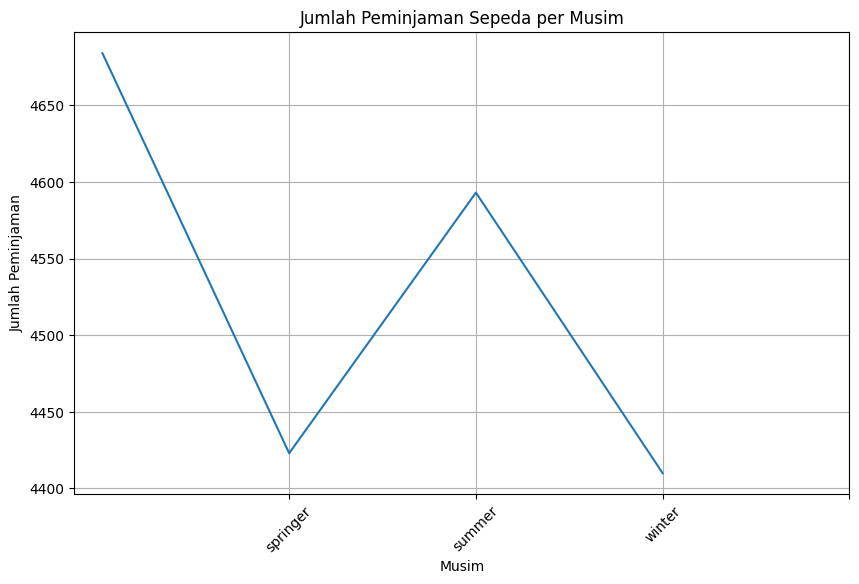

In [25]:
plt.figure(figsize=(10,6))
plt.plot(rent_per_season)
plt.title("Jumlah Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(1, 5), rotation=45)
plt.grid(True)
plt.show()

**Insight:**
Untuk menghitung jumlah peminjam terbanyak dalam musim tertentu, dilakukan penghitungan jumlah peminjam. Penghitungan ini dilakukan dengan menjumlahkan peminjam di tabel day_df dan hour_df.

Kesimpulan yang dapat diambil adalah musim yang memiliki jumlah peminjam terbanyak adalah musim ke 3 (fall) sedangkan musim dengan peminjam sepeda paling sedikit adalah musim ke 4 (Winter).

## Conclusion

- Bulan dengan jumlah peminjam paling banyak ada pada bulan ke 5 jaitu bulan Mei.
- Musim dengan jumlah peminjam paling banyak ada pada musim ke 3 yaitu musim gugur (fall)

### merge data untuk selanjutnya membuat dashboard

In [27]:
all_df = pd.merge(day_df, hour_df, on="dteday", how="outer")
all_df.head()
all_df.to_csv("all_df.csv", index=False)